# 7.3 케라스로 신경망 모델 구현

## 7.3.1 2층 피드 포워드 신경망

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
# 필요한 라이브러리 import 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time
np.random.seed(1) # 케라스 내부에서 사용되는 난수를 초기화하는 코드
import keras.optimizers
from keras.models import Sequential 
from keras.layers.core import Dense, Activation 

# 데이터 로드 
outfile = np.load('class_data.npz')
X_train = outfile['X_train']
T_train = outfile['T_train']
X_test = outfile['X_test']
T_test = outfile['T_test']
X_range0 = outfile['X_range0']
X_range1 = outfile['X_range1']

In [3]:
# 데이터를 그리기 
def Show_data(x, t) :
  wk, n = t.shape
  c = [[0, 0, 0], [.5, .5, .5], [1, 1, 1]]
  for i in range(n) :
    plt.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 
             linestyle = 'none', marker = 'o', markeredgecolor = 'black', color = c[i], alpha = 0.8)
  plt.grid(True)

In [4]:
# 난수 초기화
np.random.seed(1)

# Sequential 모델 자석
model = Sequential()
# model중간층에 Dense()라는 전결합형층 추가
model.add(Dense(2, input_dim = 2, activation = 'sigmoid', kernel_initializer = 'uniform')) # Dense()의 첫번째 인수 2는 뉴런의 수. 
model.add(Dense(3, activation = 'softmax', kernel_initializer = 'uniform')) 
sgd = tf.keras.optimizers.SGD(learning_rate = 1, momentum = 0.0, decay = 0.0, nesterov = False) 
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy']) 
# learning_rate은 학습 속도. sgd을 model.compile()에 전달하여 학습방법 설정.

# 학습
startTime = time.time()
history = model.fit(X_train, T_train, epochs = 1000, batch_size = 100, verbose = 0, validation_data = (X_test, T_test)) # 실제 학습 실행

# 모델평가
score = model.evaluate(X_test, T_test, verbose = 0) # 최종학습의 평가 값을 출력. score[0]은 테스트 데이터의 상호 엔트로피 오차
print('cross entropy {0:3.2f}, accuracy {1:3.2f}'.format(score[0], score[1]))

calculation_time = time.time() - startTime
print("Calculation time:{0:.3f} sec".format(calculation_time))

cross entropy 0.27, accuracy 0.90
Calculation time:13.198 sec


# 7.3.2 케라스 사용의 흐름

TypeError: order must be str, not int

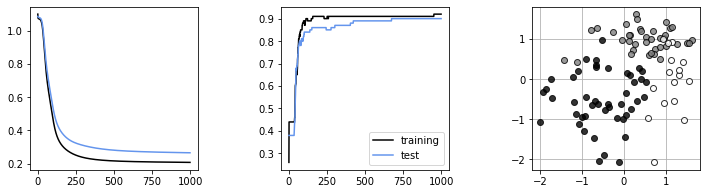

In [5]:
plt.figure(1, figsize = (12, 3))
plt.subplots_adjust(wspace = 0.5)

# 학습 곡선 표시 
plt.subplot(1, 3, 1)
plt.plot(history.history['loss'], 'black', label = 'training') # 학습 과정의 훈련 데이터의 교차 엔트로피 오차의 시계열 정보
plt.plot(history.history['val_loss'], 'cornflowerblue', label = 'test') # 훈련데이터의 교차 엔트로피 오차

# 정확도 표시 
plt.subplot(1, 3, 2)
plt.plot(history.history['accuracy'], 'black', label = 'training') # 훈련데이터 정답률
plt.plot(history.history['val_accuracy'], 'cornflowerblue', label = 'test') # 테스트 데이터의 정답률
plt.legend()

# 경계선 표시 
plt.subplot(1, 3, 3)
Show_data(X_test, T_test)
xn = 60 # 등고선 표시 해상도
x0 = np.linspace(X_range0[0], X_range0[1], xn)
x1 = np.linspace(X_range1[0], X_range1[1], xn)
xx0, xx1 = np.meshgrid(x0, x1)
x = np.c_[np.reshape(xx0, xn * xn, 1), np.reshape(xx1, xn * xn, 1)] 
y = model.predict(x) # 학습이 완료된 모델에 의한 임의의 입력 x에 대한 예측
K = 3
for ic in range(K) :
  f = y[:, ic]
  f = f.reshape(xn, xn)
  f = f.T
  cont = plt.contour(xx0, xx1, f, levels = [0.5, 0.9], colors = ['cornflowerblue', 'black'])
  cont.clabel(fmt = '%1.1f', fontsize = 9)
  plt.xlim(X_range0)
  plt.ylim(X_range1)
plt.show()